<a href="https://colab.research.google.com/github/AugustoAnguita/Bioinformatics_UB/blob/main/SESION_2/sesion_2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **VISUALIZACIÓN DE RESULTADOS DE PCA GENÓMICO: ESTRATIFICACIÓN POBLACIONAL**  




# **Recordatorio: Introducción al NoteBook**
Dentro de este cuaderno (NoteBook), se te guiará paso a paso desde la carga de un conjunto de datos hasta la realización del análisis de su contenido.

El cuaderno *Jupyter* (Python) es un enfoque que combina bloques de texto (como este) junto con bloques o celdas de código. La gran ventaja de este tipo de celda es su interactividad, ya que pueden ejecutarse para comprobar los resultados directamente en ellas. *Muy importante:* **el orden de las instrucciones es fundamental**, por lo que cada celda de este cuaderno debe ejecutarse secuencialmente. Si se omite alguna, el programa puede dar un error, así que, en caso de duda, debes comenzar desde el principio.

Antes que nada:

Es **muy muy importante** que al inicio selecciones **"*Open in draft mode*" (draft mode)** (modo borrador), en la parte superior izquierda. De lo contrario, no te permitirá ejecutar ningún bloque de código, por motivos de seguridad. Cuando se ejecute el primero de los bloques aparecerá el siguiente mensaje: "*Warning: This notebook was not created by Google.*". No te preocupes, debes confiar en el contenido del cuaderno (NoteBook) y hacer clic en "Run anyway".

¡Vamos allá!

Haz clic en el botón "play" situado a la izquierda de cada celda de código. Las líneas de código que comienzan con una almohadilla (#) son comentarios y no afectan a la ejecución del programa.

También puedes hacer clic en cada celda y presionar "*ctrl+enter*" (*cmd+enter* on Mac).

Cada vez que ejecutes un bloque, verás la salida justo debajo. La información suele estar siempre relacionada con la última instrucción, junto con todos los comandos `print()` que aparezcan en el código.




## **INDICE**
1. [Instalación del Entorno R y Librerías para Análisis del Exposoma](#install-libraries)    
2. [Carga y preparación de datos](#load-data)
3. [Visualización de resultados de PCA](#descriptive)   


## **1. Instalación del Entorno R y Librerías para Análisis del Exposoma** <a name="install-libraries"></a>

A continuación, instalamos/cargamos las librerías necesarias para esta sesión. En el contexto del análisis del exposoma, las librerías de R nos ofrecen una forma mucho más conveniente de procesar, manipular y analizar los datos. Algunas de estas librerías: `tidyverse`, `skimr`, `readr`.

La instalación de R en nuestro entorno de Google Colab se llevará a cabo en el siguiente bloque de código. Debe recordarse que todas las instalaciones de librerías que realicemos en el entorno de Google Colab permanecerán activas solo durante unas horas, tras lo cual las librerías instaladas se eliminan. Por lo tanto, será necesario volver a ejecutar el código de instalación de librerías de esta sección siempre que se necesite volver a correr el cuaderno después de este tiempo.

Nota: Recomendamos instalar las librerías 5 minutos antes del inicio de la sesión❗❗❗


In [2]:
# first we check the R version we have
R.Version()

$platform
[1] "x86_64-pc-linux-gnu"

$arch
[1] "x86_64"

$os
[1] "linux-gnu"

$system
[1] "x86_64, linux-gnu"

$status
[1] ""

$major
[1] "4"

$minor
[1] "5.1"

$year
[1] "2025"

$month
[1] "06"

$day
[1] "13"

$`svn rev`
[1] "88306"

$language
[1] "R"

$version.string
[1] "R version 4.5.1 (2025-06-13)"

$nickname
[1] "Great Square Root"

* **Install/load libraries for the session**

We will install/load the libraries necessary for the practical session, for this we will use the `pacman` package, this package is a management tool that combines the functionalities of the `install.packages` + `library` functions.


In [3]:
# Estimated execution time: 3 seconds approx.

install.packages('pacman') # allows us to install/upload packages simultaneously

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



We will install `BiocManager` and `rexposome` (these two packages are essential for exposome analysis) using the following code, as there are sometimes compatibility issues with the R version (the process takes around **20 minutes**, so it is recommended to install it during the theory session).

In [13]:
# Estimated execution time: 23 minutes approx.

if (!requireNamespace("BiocManager", quietly=TRUE))
    install.packages("BiocManager")

packages = c("tidyverse", "readr", "skimr"
)
for( pkg in packages ) {
  if( !pkg %in% rownames( installed.packages() ) ) {
    message( "Installing ", pkg )
    BiocManager::install( pkg )
  }
}

Installing skimr

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.21 (BiocManager 1.30.26), R 4.5.1 (2025-06-13)

Installing package(s) 'BiocVersion', 'skimr'



In [14]:
# Estimated execution time: XX minutes approx.
# Add all the libraries we need to use (if the package is already installed, it will automatically load the package if it is in the pacman::p_load() function).
pacman::p_load(tidyverse, readr, skimr)

In [ ]:
#if (!require("BiocManager", quietly = TRUE))
#  install.packages("BiocManager")
#BiocManager::install("rexposome", force = TRUE)


## **2. Carga y preparación de datos** <a name="load-data"></a>

A continuación encontramos las **líneas de código** necesarias para **cargar** los datos genómicos y resultados del PCA llevado a cabo con PLINK durante la clase.

**1.-** Carga de datos (los datos han sido alojados en un servidor Github público para facilitar su carga).

In [8]:
# We will load the databases as tsv files
pca <- read_tsv(url("https://raw.githubusercontent.com/AugustoAnguita/Bioinformatics_UB/main/SESION_2/datasets/sample_data.clean_pca_projected.sscore"))
ped <- read_tsv(url("https://raw.githubusercontent.com/AugustoAnguita/Bioinformatics_UB/main/SESION_2/datasets/integrated_call_samples_v3.20130502.ALL.panel"))

Rows: 500 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (2): #FID, IID
dbl (12): ALLELE_CT, NAMED_ALLELE_DOSAGE_SUM, PC1_AVG, PC2_AVG, PC3_AVG, PC4...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
New names:
• `` -> `...5`
• `` -> `...6`
Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Rows: 2504 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (4): sample, pop, super_pop, gender
lgl (2): ...5, ...6

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [11]:
#Exploramos las primeras filas y columnas de cada dataset
head(pca)
head(ped)

#FID,IID,ALLELE_CT,NAMED_ALLELE_DOSAGE_SUM,PC1_AVG,PC2_AVG,PC3_AVG,PC4_AVG,PC5_AVG,PC6_AVG,PC7_AVG,PC8_AVG,PC9_AVG,PC10_AVG
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
HG00403,HG00403,460114,460114,-1.91899e-03,-0.0249041,0.00535490,-0.01199200,-0.00485106,-0.00273264,-0.00538222,-0.000836390,0.000970541,0.00643414
HG00404,HG00404,460536,460536,4.46981e-05,-0.0288385,-0.01241940,-0.02323740,0.01161420,-0.00995106,-0.00962372,-0.003394630,0.014823800,0.02322080
HG00406,HG00406,458094,458094,-7.41941e-03,-0.0311196,-0.00172778,0.00314729,0.01217780,0.00507137,0.00880640,-0.013876400,-0.003144900,-0.00325521
HG00407,HG00407,458388,458388,-6.11975e-03,-0.0262028,0.00675476,0.00381032,0.01620170,0.00246113,-0.01939580,-0.000398213,0.011081600,0.01534630
HG00409,HG00409,461730,461730,-9.47582e-05,-0.0296013,0.00609516,0.01726930,-0.01723710,-0.00445599,0.01525370,0.002898720,0.038673400,0.03945910
HG00410,HG00410,461618,461618,-1.99981e-03,-0.0273981,0.00259013,0.01645980,-0.01664450,0.01182640,0.02982370,-0.004118110,0.034750400,0.04645940


sample,pop,super_pop,gender,...5,...6
<chr>,<chr>,<chr>,<chr>,<lgl>,<lgl>
HG00096,GBR,EUR,male,NA,NA
HG00097,GBR,EUR,female,NA,NA
HG00099,GBR,EUR,female,NA,NA
HG00100,GBR,EUR,female,NA,NA
HG00101,GBR,EUR,male,NA,NA
HG00102,GBR,EUR,female,NA,NA


**2.-** Podemos consultar su estructura y dimensiones

In [22]:
dplyr::glimpse(pca) # Tenemos 500 individuos y 14 variables
skimr::skim(pca)

── Data Summary ────────────────────────
                           Values
Name                       pca   
Number of rows             500   
Number of columns          14    
_______________________          
Column type frequency:           
  character                2     
  numeric                  12    
________________________         
Group variables            None  

── Variable type: character ────────────────────────────────────────────────────
  skim_variable n_missing complete_rate min max empty n_unique whitespace
1 #FID                  0             1   7   7     0      500          0
2 IID                   0             1   7   7     0      500          0

── Variable type: numeric ──────────────────────────────────────────────────────
   skim_variable           n_missing complete_rate     mean        sd
 1 ALLELE_CT                       0             1  4.61e+5 1993.    
 2 NAMED_ALLELE_DOSAGE_SUM         0             1  4.61e+5 1993.    
 3 PC1_AVG             

ERROR: Error in is.null(text_repr) || nchar(text_repr) == 0L: 'length = 17' in coercion to 'logical(1)'


In [37]:
dplyr::glimpse(ped) # Este es el archivo original de genómica con 2504 sujetos y sus datos de ancestría


Rows: 2,504
Columns: 4
$ sample    <chr> "HG00096", "HG00097", "HG00099", "HG00100", "HG00101", "HG00…
$ pop       <chr> "GBR", "GBR", "GBR", "GBR", "GBR", "GBR", "GBR", "GBR", "GBR…
$ super_pop <chr> "EUR", "EUR", "EUR", "EUR", "EUR", "EUR", "EUR", "EUR", "EUR…
$ gender    <chr> "male", "female", "female", "female", "male", "female", "mal…



ACB ASW BEB CDX CEU CHB CHS CLM ESN FIN GBR GIH GWD IBS ITU JPT KHV LWK MSL MXL 
 96  61  86  93  99 103 105  94  99  99  91 103 113 107 102 104  99  99  85  64 
PEL PJL PUR STU TSI YRI 
 85  96 104 102 107 108 

**3.-** Como hemos realizado un filtro de individuos previo al PCA, debemos seleccionar del archivo de ancestría, únicamente los individuos que han permanecido en nuestro filtrado (lo haremos en R con un "inner_join")

In [39]:
pcaped <- inner_join(pca, ped, by = c("IID" = "sample"))
table(pcaped$pop) # Podemos consultar cuantos individuos tenemos de cada tipo de ancestría


CDX CHB CHS JPT KHV 
 93 103 105 102  97 

### **3.1.- Visualizing distribution and dispersion of exposome variables**

Una vez que tenemos correctamente formateado nuestro dataset con los datos del PCA y los datos de ancestría, podemos proceder a su representación visual.

La codificación de ancestría utilizada en estos archivos vienen explicada en la siguiente tabla, necesaria para interpretar el gráfico.

| Código  | Población                           | Región / País principal                         |
| ------- | ----------------------------------- | ----------------------------------------------- |
| **CDX** | Chinese Dai in Xishuangbanna, China | Etnia Dai, provincia de Yunnan (China)          |
| **CHB** | Han Chinese in Beijing, China       | Chinos Han, Pekín                               |
| **CHS** | Southern Han Chinese                | Chinos Han del sur de China                     |
| **JPT** | Japanese in Tokyo, Japan            | Japoneses en Tokio                              |
| **KHV** | Kinh in Ho Chi Minh City, Vietnam   | Grupo étnico Kinh, Ciudad Ho Chi Minh (Vietnam) |



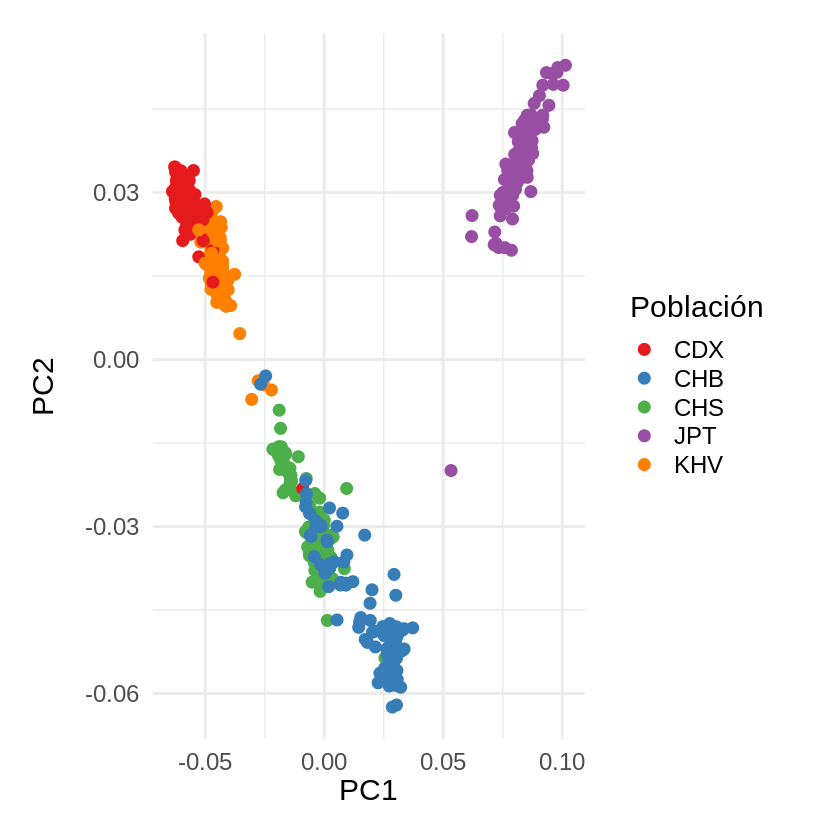

In [41]:
# Usamos el la función ggplot para representar los dos primeros componentes principales.

ggplot(pcaped, aes(x = PC1_AVG, y = PC2_AVG, color = pop)) +
  geom_point(size = 3) +
  theme_minimal(base_size = 18) +  # texto y ejes más grandes
  theme(
    legend.position = "right",
    plot.margin = margin(20, 20, 20, 20)
  ) +
  labs(x = "PC1", y = "PC2", color = "Población") +
  scale_color_brewer(palette = "Set1")  # paleta llamativa y diferenciada




Es interesante observar como **la población japonesa presenta diferencias marcadas con respecto al resto de subpoblaciones asiáticas** para los SNPs seleccionados.